## Importing Essential Libraries

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

## Loading the rice dataset from uci repo

In [37]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
yeast = fetch_ucirepo(id=110) 

X = yeast.data.features.to_numpy() 
y_raw = yeast.data.targets.to_numpy()

### converting y to 1D array


In [38]:
y = y_raw.ravel()

## Splitting the dataset into the Training and Test sets

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

## Feature Scaling
we scale the features so they're in the same range

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Running GridSearch for hyperparameter tuning.

In [52]:
from svm_helper import run_grid_search
best_params, best_score = run_grid_search(X_train, y_train)

C:\Python311\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Python311\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


## Training the SVM model on the Training set

In [42]:
from sklearn.svm import SVC
classifier = SVC(kernel="linear", degree=3, random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

## Insample Prediction: on training data

In [43]:
y_pred_ins = classifier.predict(X_train)
#print(np.concatenate((y_pred_ins.reshape(len(y_pred_ins),1), y_train.reshape(len(y_train),1)),1))

### Let's see the confusion matrix and accuracy score

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred_ins)
#print(cm)
accuracy_score(y_train, y_pred_ins)

0.6059730250481695

## Outsample Prediction: on test data and confusion matrix

In [45]:
y_pred_out = classifier.predict(X_test)

In [46]:
cm = confusion_matrix(y_test, y_pred_out)
#print(cm)
accuracy_score(y_test, y_pred_out)

0.5829596412556054

# Plotting The Learning Curve

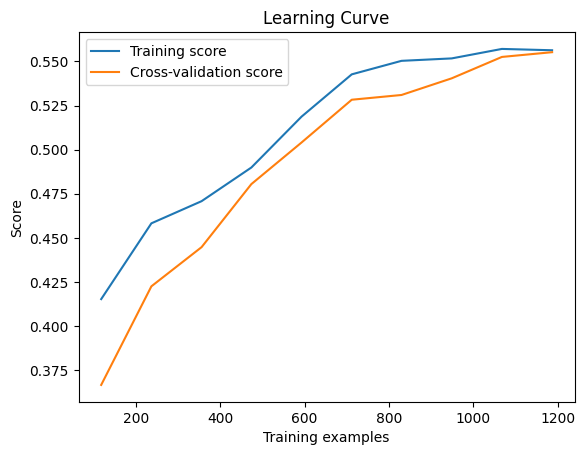

In [49]:
from sklearn.model_selection import learning_curve,StratifiedKFold
# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5)

train_sizes, train_scores, test_scores = learning_curve(classifier, X, y, cv=skf, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=10, shuffle=True)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.title('Learning Curve')
plt.show()

In [50]:
# print(train_sizes)
# print(train_scores)
# print("Test scores \n", test_scores)


In [51]:
print(train_accuracies)
print(test_accuracies)

NameError: name 'train_accuracies' is not defined